Silhouette Scores

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits #opens fits files
from sklearn.cluster import KMeans #clustering algorithim
from sklearn.metrics import silhouette_score #calculates silhouette scores


import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
def open_file(path):
    '''
    Function:
    path: Used for looping through several fits files with a common naming scheme as shown below
    
    This function opens fits files from the RAMPS data and extracts the data into a
    pandas dataframe
        - hdr.set was used to fill in headers that were empty and giving error messages 
        - the 2nd spectral channel is removed, should only be 1 channel for a map
        - nan values were dropped 
        - 
    '''
    print("Opening file", path)
    hdul = fits.open('D:/hf_vel/'+path+'_NH3_1-1_hf_width.fits')
    hdr = hdul[0].header
    hdr.set('BLANCK', 'none') # idk why blanck = -1 originally 
    hdr.set('NAXIS3',1) #i get an error message when this is gone idk
    d = hdul[0].data #3D with 2 channels ?
    data = np.swapaxes(d,0,2)
    hdul.close()
    coords = []
    values = []
    for (i, j, k), value in np.ndenumerate(data):
        coords.append((i, j, k))
        values.append(value)
    df = pd.DataFrame({'Coordinate': coords, 'Value': values})
    df[['X', 'Y', 'Z']] = pd.DataFrame(df['Coordinate'].tolist(), index=df.index)
    df = df.drop('Coordinate', axis=1)
    DF = df.dropna() #removing nan values 
    #reduce data frame to points of interest 
    lowHF = DF[(DF['Value'] <=100)]
    lowHF_XY = lowHF.drop(columns=["Z","Value"])
    return lowHF_XY, lowHF

Opening file L20
Plotting Silhouette Plot for L20


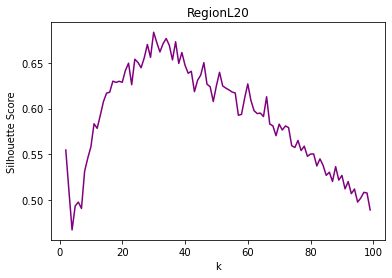

In [4]:
#best_k = [] # best number of clusters for the region
#best_sc = [] # best silhouette score

paths = ['L47','L43','L41','L40_5','L40','L39_5','L39','L38_5','L38','L37_5',
          'L37','L36_5','L36','L35_5','L35','L34_5','L34','L33_5','L33','L32_5'
          ,'L32','L31_5','L31','L30_5','L30','L29_5','L29','L28_5','L28','L27_5'
          ,'L27','L26_5','L26','L25_5','L25','L24_5','L24','L23_5','L23','L22_5'
          ,'L22','L21_5','L21','L20_5','L20','L19','L18_5','L18','L17_5','L17',
          'L16_5','L15_5','L15','L14_5','L14','L13_5','L13','L12_5','L12',
          'L11_5','L11','L10_5','L10']

for L in paths:
    # for plotting scores against k clusters
    silhouette_scores = []
    k_vals = []
    
    # get target region data
    data, dummy = open_file(L)
    
    if (L == 'L47' or L == 'L43' or L == 'L41' or L == 'L40_5' or L == 'L40' 
    or L == 'L39_5' or L == 'L34' or L == 'L22_5'):
        n_clusters = list(range(2,30))
        max_n = len(n_clusters)+1
    else:
        n_clusters = list(range(2,100)) 
        max_n = len(n_clusters)+1
    
    q = 2 # minimum number of clusters
    while q <= max_n:
        #perform kmeans
        km = KMeans(n_clusters=q,init='k-means++', tol = 0.1)
        km.fit(data)
        labels = km.predict(data)
        
        #calculate score
        sc = silhouette_score(data,labels, metric = 'euclidean')
        silhouette_scores.append(sc)
        k_vals.append(q)
        q = q + 1
    
    print("Plotting Silhouette Plot for", L)
    plt.plot(k_vals, silhouette_scores, color = 'purple')
    plt.title("Region"+L+"")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.savefig("D:/Silhouette_plots/"+L+"_silhouette",dpi = 100)
    plt.close()
    
    '''
    max_sc = max(silhouette_scores)
    max_i = silhouette_scores.index(max_sc)
    best_n = n_clusters[max_i]
    best_k.append(best_n) # get best k number of clusters for each region
    best_sc.append(max_sc)
    print("Region", L, "has max silhouette score of", max_sc, "for", best_n, "number of clusters", '\n')
    '''